# Credit Card Default Prediction

1)Problem Statement:

Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. In this way, one of the biggest threats faces by commercial banks is the risk prediction of credit clients. The goal is to predict the probability of credit default based on credit card owner'scharacteristics and payment history.

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [51]:
#Basic Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



Import the CSV Data as Pandas DataFrame

In [27]:
df = pd.read_csv('UCI_Credit_Card.csv')


Show Top 5 Records

In [28]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Shape of the dataset

In [29]:
df.shape

(30000, 25)

3. Data Checks to perform


3.1 Check Missing values

In [30]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are no missing values in the data set

"default.payment.next.month" is a feature and is the target variable we are trying to predict.

3.2 Check Duplicates

In [31]:

df.duplicated().sum()

0

There are no duplicates values in the data set

3.3 Check data types

In [32]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

3.4 Checking the number of unique values of each column

In [33]:

df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64


3.5 Check statistics of data set

In [34]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Total 30,000 clients in the dataset;

The average amount of credit card is (NT dollar) 167,484. Minimal amount a credit card can receive is (NT dollar)10000 while max value is (NT dollar)1M

In average, the client who owns a credit card is 35.48 year old in our sample, the yougest age one can get a credit card is 21 while the most senior age is 79.

22.1% of credit card contracts that will default next month

3.7 Exploring Data

In [35]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


Drop ID and rename "default.payment.next.month"

In [36]:
df.drop(["ID"], axis=1, inplace= True) 
df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

In [37]:
df.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

Drop repeated Categories:
    
Some categorical data have repeated categories. First, let check the the different categories in each variable, which variable contain repeated catigories and then drop the repeated one:

In [38]:
print("Categories in 'Sex' variable:      ",end=" ")
print(df['SEX'].unique())

print("Categories in 'Education' variable:     ",end=" ")
print(df['EDUCATION'].unique())

print("Categories in 'Marriage' variable:    ",end=" ")
print(df['MARRIAGE'].unique())

print("Categories in 'PAY_0' variable:     ",end="  ")
print(df['PAY_0'].unique())

print("Categories in 'PAY_2' variable:     ",end="  ")
print(df['PAY_2'].unique())

print("Categories in 'PAY_3' variable:     ",end="  ")
print(df['PAY_3'].unique())

print("Categories in 'PAY_4' variable:     ",end="  ")
print(df['PAY_4'].unique())

print("Categories in 'PAY_5' variable:     ",end="  ")
print(df['PAY_5'].unique())

print("Categories in 'PAY_6' variable:     ",end="  ")
print(df['PAY_6'].unique())

Categories in 'Sex' variable:       [2 1]
Categories in 'Education' variable:      [2 1 3 5 4 6 0]
Categories in 'Marriage' variable:     [1 2 3 0]
Categories in 'PAY_0' variable:       [ 2 -1  0 -2  1  3  4  8  7  5  6]
Categories in 'PAY_2' variable:       [ 2  0 -1 -2  3  5  7  4  1  6  8]
Categories in 'PAY_3' variable:       [-1  0  2 -2  3  4  6  7  1  5  8]
Categories in 'PAY_4' variable:       [-1  0 -2  2  3  4  5  7  6  1  8]
Categories in 'PAY_5' variable:       [-2  0 -1  2  3  5  4  7  8  6]
Categories in 'PAY_6' variable:       [-2  2  0 -1  3  6  4  7  8  5]


EDUCATION FEATURE:

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

category 4,5,6 and 0 can Group into class 4

In [39]:
df['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

MARRIAGE FEATURE:

Marital status (1=married, 2=single, 3=others)

We'll group categories 1 into category 3

In [40]:
df['MARRIAGE'].replace({0:3}, inplace=True)
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

# Data Visualization:

Target Variable:¶
    
We'll visualize the target column "default" to figure out how imblance (balance) the data is

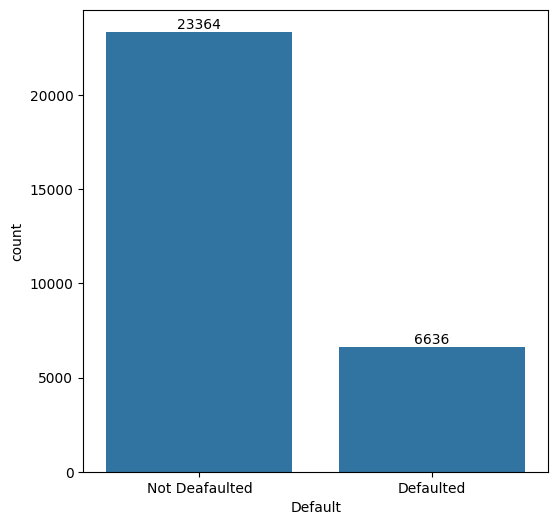

In [41]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x= df['Default'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=[  "Not Deafaulted",   "Defaulted"])
plt.show()

The data is quite imbalance which about 22% of clients will default next month.

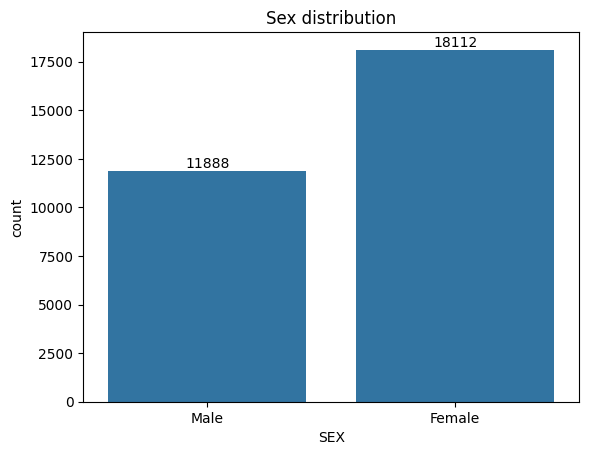

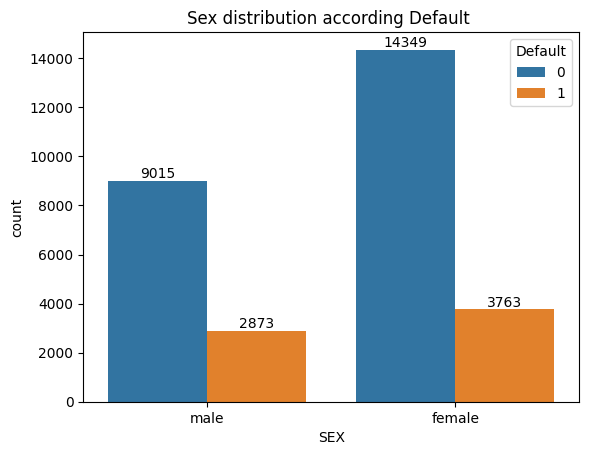

In [42]:
# SEX Variable:
ax=sns.countplot(x= df['SEX'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Sex distribution")
plt.show()

ax=sns.countplot(data=df, x="SEX", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["male", "female"])
plt.title("Sex distribution according Default ")
plt.show()



From the above graph we can see that more Female clients own credit card than Male client.

About 24% of male clients fraud credit card while the ratio for female is around 20%

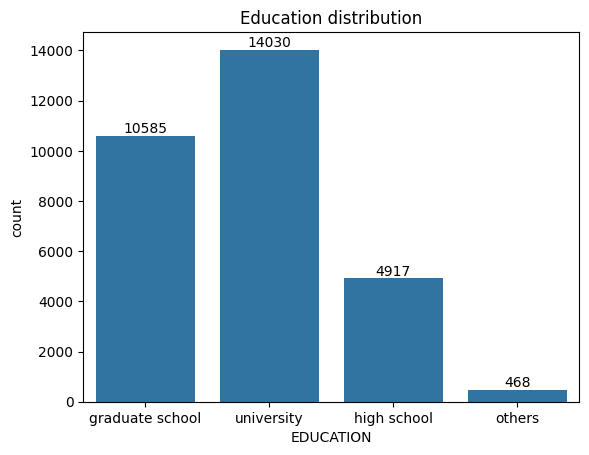

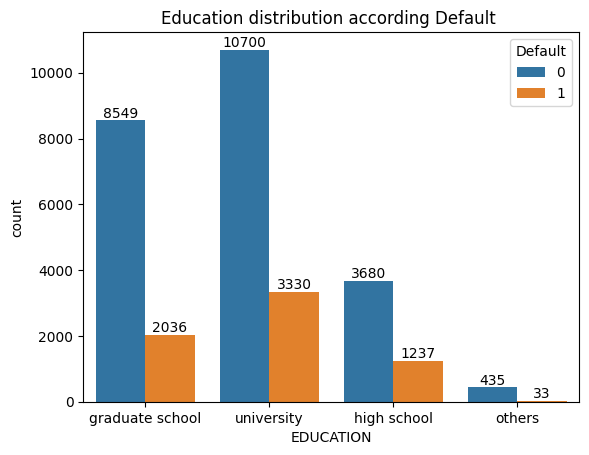

In [43]:
#EDUCATION VARIABLE:
ax=sns.countplot(x= df['EDUCATION'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution")
plt.show()

ax=sns.countplot(data=df, x="EDUCATION", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution according Default ")
plt.show()

University students are the group which highest number customers using credit cards (47%)

High school students are the group which has highest fraud cases(25%), follow by university student(23%)

MARRIAGE STATUS VARIABLE:

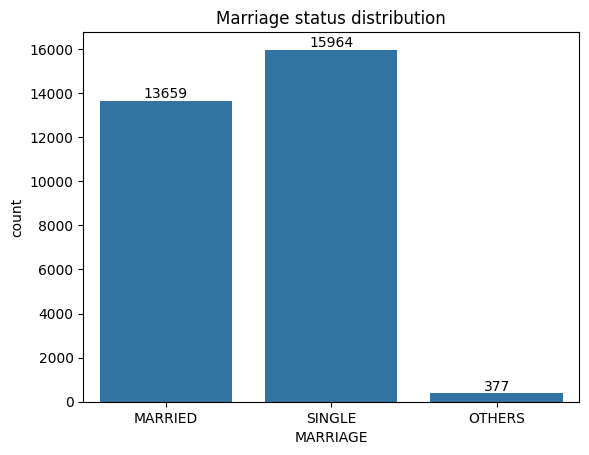

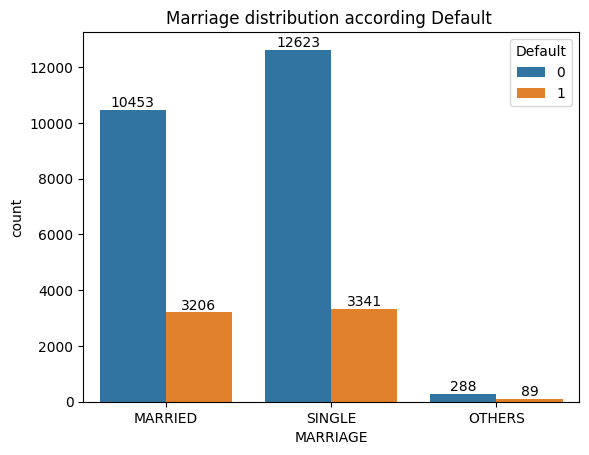

In [44]:
ax=sns.countplot(x= df['MARRIAGE'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage status distribution")
plt.show()

ax=sns.countplot(data=df, x="MARRIAGE", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage distribution according Default ")
plt.show()

Single is the group which highest number of customers using credit cards (53%)

Married people are the group which has highest fraud cases(30%)

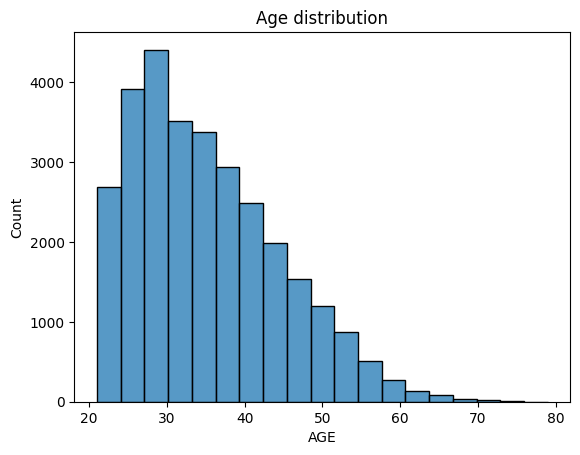

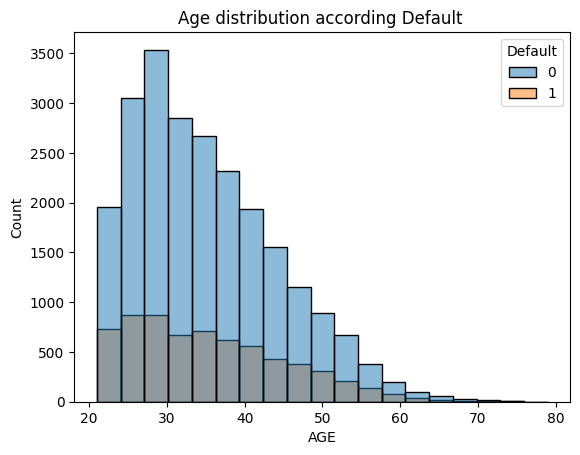

In [45]:
#AGE VARIABLE:

sns.histplot(data=df, x="AGE",binwidth=3)
plt.title("Age distribution")
plt.show()

sns.histplot(data=df, x="AGE", hue="Default", binwidth=3)
plt.title("Age distribution according Default ")
plt.show()

Histogram is right-skewed meaning the older customers are less likely to use credit cards

The main client is in their 30s

Customers in their 30s are also the most prone to credit fraud

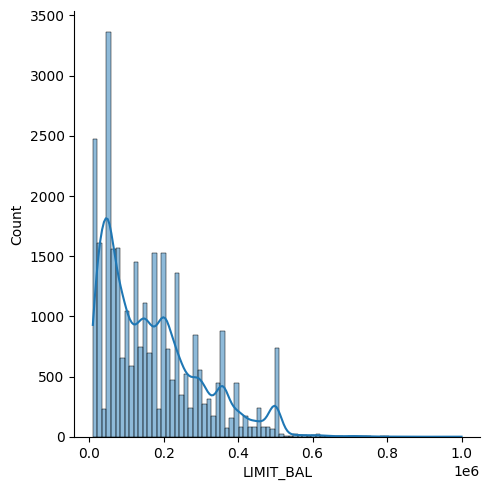

In [46]:
#LIMIT_BAL VARIABLE:
sns.displot(df.LIMIT_BAL, kde=True)

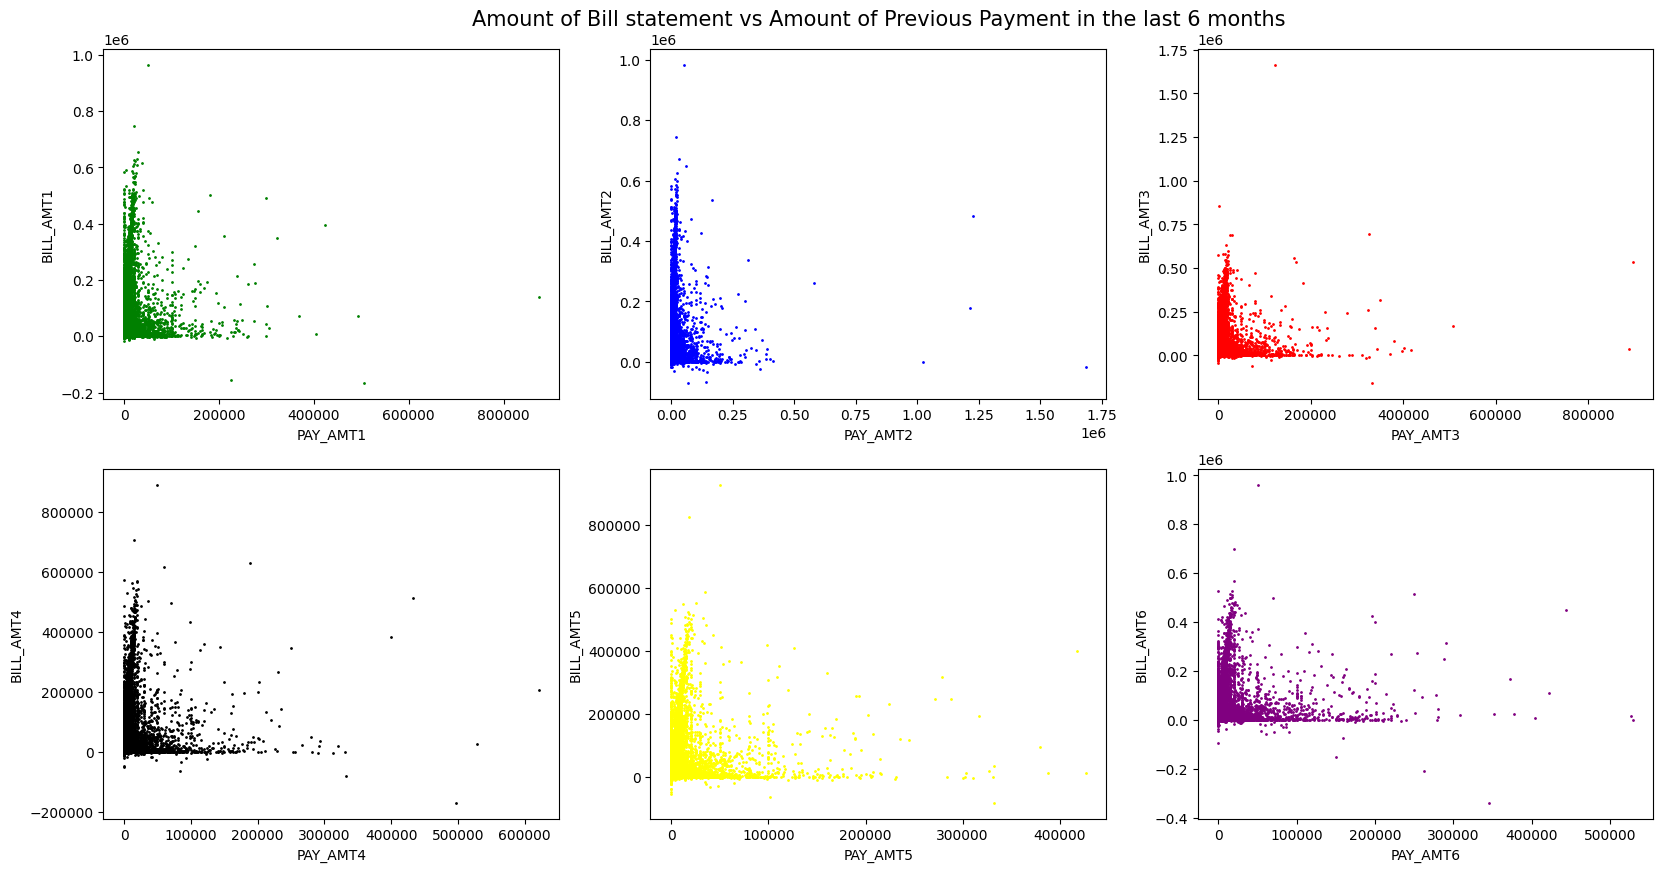

In [47]:
#Amount of bill statement and Amount of previous payment

plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='green', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='blue', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Amount of Bill statement vs Amount of Previous Payment in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='red', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='black', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='yellow', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='purple', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

Correlation Analysis:

<Axes: >

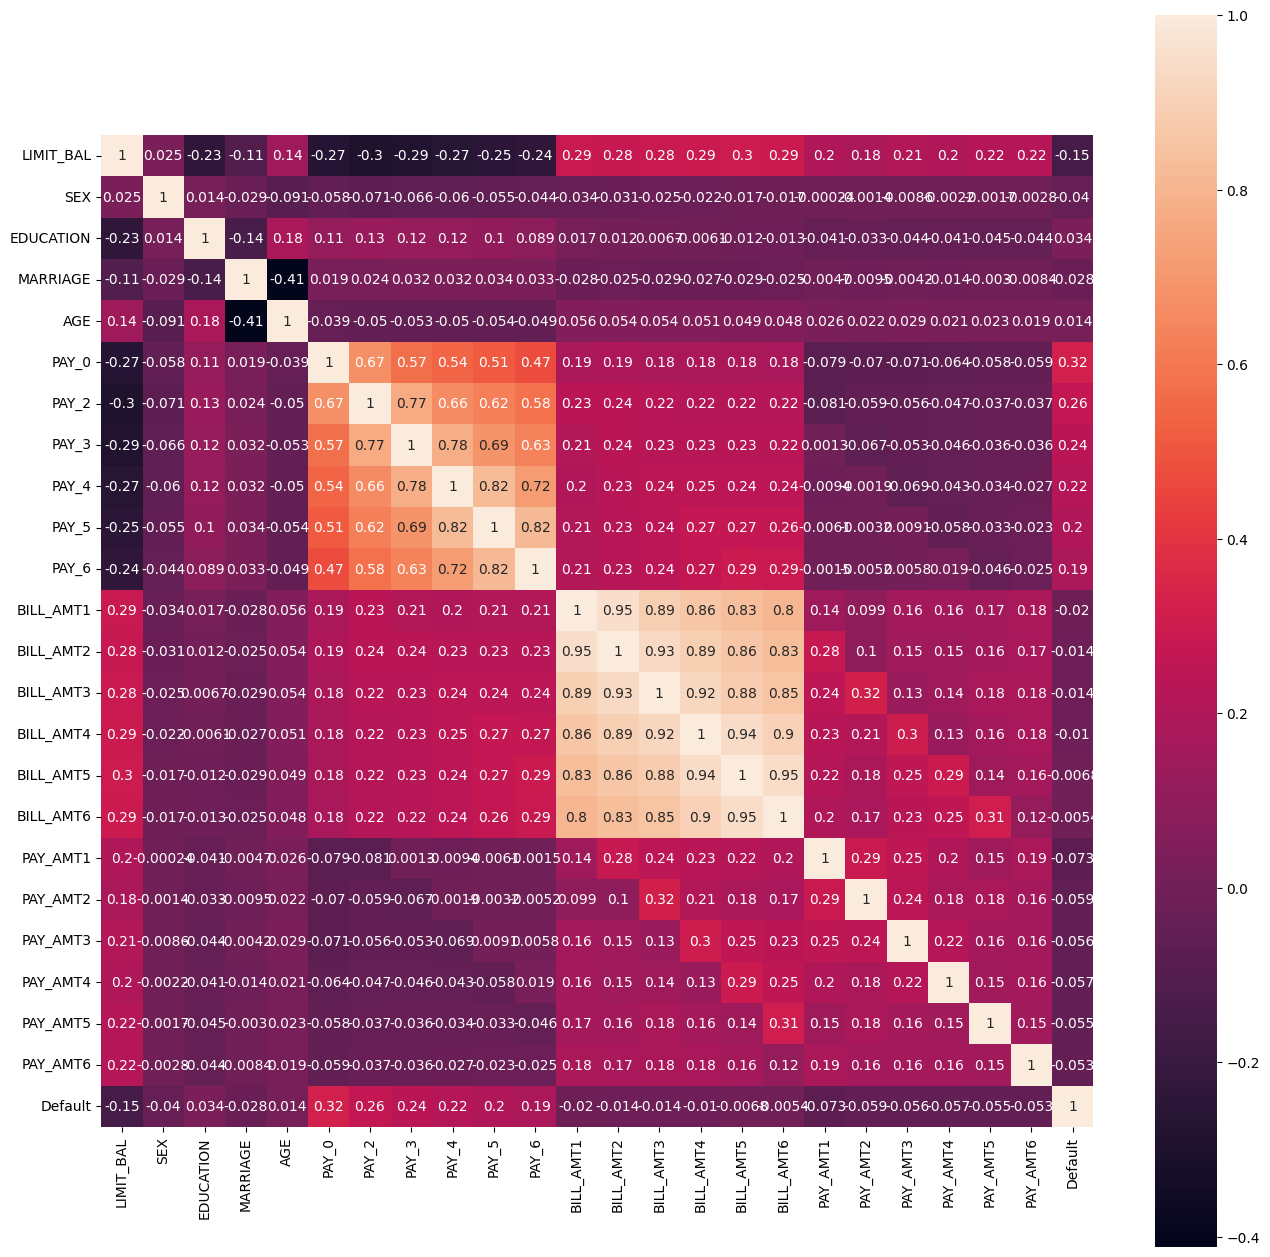

In [48]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(),annot = True,square = True)

Correlation is high among PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6.

Create target feaure(y) and independent feature(X)

In [49]:
X = df.drop(['Default'], axis=1)

y = df['Default']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
